<a href="https://colab.research.google.com/github/vkaankadae/myrepo/blob/master/Student_Grad_Outcome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Dropout analysis** - 2015 Cohort 4yr Grad Outcome Dataset of NYC schools

In [7]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [17]:
url = 'https://github.com/vkaankadae/myrepo/blob/master/GRAD_RATE_OUTCOMES_2018-19.xlsx?raw=true'
df_data = pd.read_excel(url)

In [18]:
df_data.head()

,school_name,nrc_code,nrc_desc,county_name,group_code,group_name,enroll_cnt,grad_cnt,grad_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,ALBANY HIGH SCHOOL,3,Urban-Suburban High Needs,ALBANY,1,Female,336,249,0.74,34,0.10,2,0.01,49,0.15
1,ALBANY HIGH SCHOOL,3,Urban-Suburban High Needs,ALBANY,2,Male,352,221,0.63,56,0.16,5,0.01,65,0.18
2,ALBANY HIGH SCHOOL,3,Urban-Suburban High Needs,ALBANY,4,American Indian/Alaska Native,0,0,0.00,0,0.00,0,0.00,0,0.00
3,ALBANY HIGH SCHOOL,3,Urban-Suburban High Needs,ALBANY,5,Black,351,223,0.64,46,0.13,5,0.01,70,0.20
4,ALBANY HIGH SCHOOL,3,Urban-Suburban High Needs,ALBANY,6,Hispanic,110,72,0.65,17,0.15,2,0.02,19,0.17


In [19]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   school_name    18408 non-null  object 
 1   nrc_code       18408 non-null  int64  
 2   nrc_desc       18408 non-null  object 
 3   county_name    18408 non-null  object 
 4   group_code     18408 non-null  int64  
 5   group_name     18408 non-null  object 
 6   enroll_cnt     18408 non-null  int64  
 7   grad_cnt       18408 non-null  int64  
 8   grad_pct       18408 non-null  float64
 9   still_enr_cnt  18408 non-null  int64  
 10  still_enr_pct  18408 non-null  float64
 11  ged_cnt        18408 non-null  int64  
 12  ged_pct        18408 non-null  float64
 13  dropout_cnt    18408 non-null  int64  
 14  dropout_pct    18408 non-null  float64
dtypes: float64(4), int64(7), object(4)
memory usage: 2.1+ MB


In [20]:
df_data[df_data.duplicated()]

,school_name,nrc_code,nrc_desc,county_name,group_code,group_name,enroll_cnt,grad_cnt,grad_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
8732,NEW VISIONS CHARTER HIGH SCHOOL FOR ADVANCED M...,7,Charters,BRONX,4,American Indian/Alaska Native,0,0,0.0,0,0.0,0,0.0,0,0.0
8735,NEW VISIONS CHARTER HIGH SCHOOL FOR ADVANCED M...,7,Charters,BRONX,7,Asian/Pacific Islander,0,0,0.0,0,0.0,0,0.0,0,0.0
8736,NEW VISIONS CHARTER HIGH SCHOOL FOR ADVANCED M...,7,Charters,BRONX,8,White,0,0,0.0,0,0.0,0,0.0,0,0.0
8737,NEW VISIONS CHARTER HIGH SCHOOL FOR ADVANCED M...,7,Charters,BRONX,9,Multiracial,0,0,0.0,0,0.0,0,0.0,0,0.0
8742,NEW VISIONS CHARTER HIGH SCHOOL FOR ADVANCED M...,7,Charters,BRONX,14,Formerly English Language Learner,7,7,1.0,0,0.0,0,0.0,0,0.0
8745,NEW VISIONS CHARTER HIGH SCHOOL FOR ADVANCED M...,7,Charters,BRONX,20,Homeless,0,0,0.0,0,0.0,0,0.0,0,0.0
8746,NEW VISIONS CHARTER HIGH SCHOOL FOR ADVANCED M...,7,Charters,BRONX,21,Not Homeless,0,0,0.0,0,0.0,0,0.0,0,0.0


**Correlation**

In [21]:
df_data.corr()

,nrc_code,group_code,enroll_cnt,grad_cnt,grad_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
nrc_code,1.000000,-0.012743,-0.007816,0.029034,-0.002516,-0.173342,-0.207478,-0.120862,-0.120626,-0.152738,-0.222809
group_code,-0.012743,1.000000,-0.012791,-0.019098,-0.153626,0.020967,0.022826,0.007393,0.006293,0.019744,0.040647
enroll_cnt,-0.007816,-0.012791,1.000000,0.986817,0.417744,0.613474,0.060853,0.425015,0.037794,0.610403,0.071193
grad_cnt,0.029034,-0.019098,0.986817,1.000000,0.441188,0.489590,-0.021936,0.359093,0.002971,0.493902,-0.001314
grad_pct,-0.002516,-0.153626,0.417744,0.441188,1.000000,0.113296,0.019389,0.113691,0.041897,0.148238,0.105065
still_enr_cnt,-0.173342,0.020967,0.613474,0.489590,0.113296,1.000000,0.516100,0.495624,0.153610,0.722664,0.275558
still_enr_pct,-0.207478,0.022826,0.060853,-0.021936,0.019389,0.516100,1.000000,0.195052,0.246310,0.236867,0.429180
ged_cnt,-0.120862,0.007393,0.425015,0.359093,0.113691,0.495624,0.195052,1.000000,0.490174,0.443333,0.195330
ged_pct,-0.120626,0.006293,0.037794,0.002971,0.041897,0.153610,0.246310,0.490174,1.000000,0.132259,0.266380
dropout_cnt,-0.152738,0.019744,0.610403,0.493902,0.148238,0.722664,0.236867,0.443333,0.132259,1.000000,0.446383


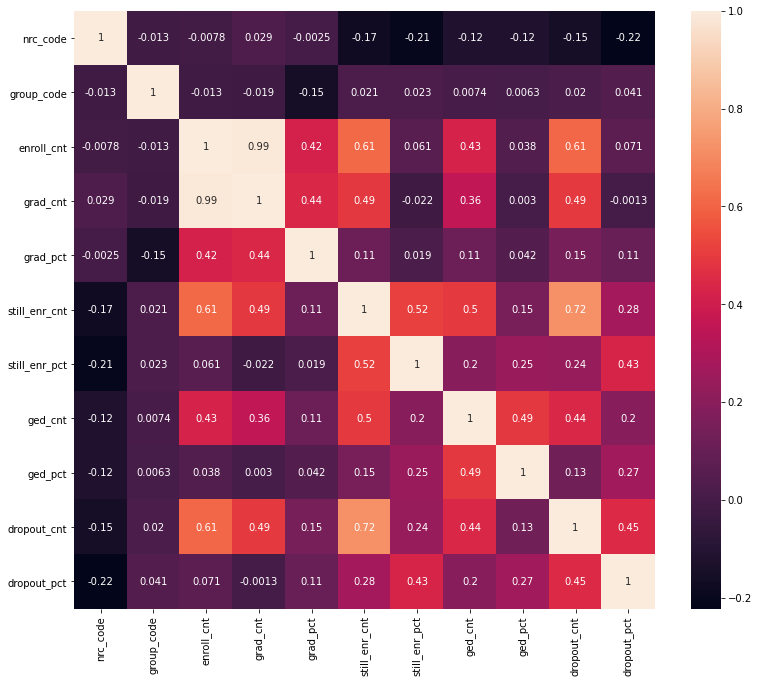

In [22]:
fig, ax = plt.subplots(figsize=(13, 11))
sb.heatmap(df_data.corr(),annot=True)
plt.show()

**Students group visualization**

In [ ]:
df_data['group_name'].unique()

array(['Female', 'Male', 'American Indian/Alaska Native', 'Black',
       'Hispanic', 'Asian/Pacific Islander', 'White', 'Multiracial',
       'General Education Students', 'Students with Disabilities',
       'Not English Language Learner', 'English Language Learner',
       'Formerly English Language Learner', 'Economically Disadvantaged',
       'Not Economically Disadvantaged', 'Homeless', 'Not Homeless'],
      dtype=object)

In [ ]:
total_2015_cohort = (df_data[(df_data['group_name'] == 'Male')]['enroll_cnt'].sum()) + (df_data[(df_data['group_name'] == 'Female')]['enroll_cnt'].sum())

print ('Total 2015 Cohort students = ', total_2015_cohort)

Total 2015 Cohort students =  199631


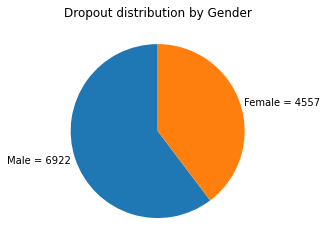

In [ ]:
# Gender

df_data['Gender'] = ['Male' if grp=='Male' else 'Female' if grp=='Female' else None \
                         for grp in (df_data['group_name'])]

male = df_data[(df_data['Gender'] == 'Male')]['dropout_cnt'].sum()
female = df_data[(df_data['Gender'] == 'Female')]['dropout_cnt'].sum()

pie_data = [male, female]
pie_labels = ['Male = '+ str(male), 'Female = '+ str(female)]

plt.pie(pie_data, labels=pie_labels, labeldistance=1.05, startangle=90)
plt.title('Dropout distribution by Gender')

plt.show()

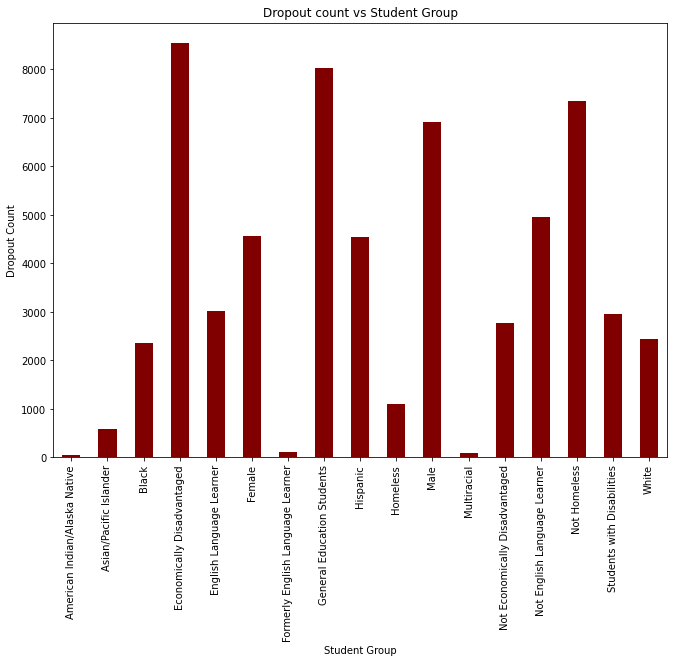

In [ ]:
# all groups

stud_grp = df_data.groupby('group_name')['dropout_cnt'].sum()

stud_grp.plot(kind='bar', figsize=(11,8), color='maroon')

plt.xlabel('Student Group')
plt.ylabel('Dropout Count')
plt.title("Dropout count vs Student Group")

plt.show()

In [ ]:
# Ethnic Group

df_data['Ethnicity'] = ['Black' if grp==5 else 'Hispanic' if grp==6 else 'Asian' if grp==7 else 'White' if grp==8 \
                        else 'American Indian' if grp==4 else 'Multiracial' if grp==9 else None \
                         for grp in (df_data['group_code'])]

In [ ]:
# set width of bar
barWidth = 0.4
 
# set height of bar
enroll = df_data.groupby('group_name')['enroll_cnt'].sum()
grad = df_data.groupby('group_name')['grad_cnt'].sum()
drop = df_data.groupby('group_name')['dropout_cnt'].sum()
 
# Set position of bar on X axis
x = np.arange(len(df_data.('Ethnicity').unique()))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(x, df_data.loc[df_data['Ethnicity'] == 'men', 'count'], color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, grad, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, drop, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
#plt.xlabel('group', fontweight='bold')
#plt.xticks([r + barWidth for r in range(len(enroll))], df_data.groupby('group_name'))
 
# Create legend & Show graphic
plt.legend()
plt.show()


#
#stud_grp = df_data.groupby('Ethnicity')['dropout_cnt'].sum()
#
#stud_grp.plot(kind='bar', figsize=(10,8), color='blue')
#
#plt.xlabel('Ethnicity')
#plt.ylabel('Dropout Count')
#plt.title('Dropout count vs Ethnicity')
#
#plt.show()

TypeError: ignored

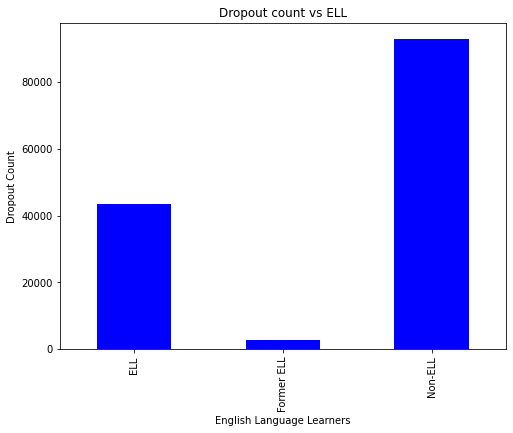

In [ ]:
# English Language Learners

df_data['ELL'] = ['ELL' if grp=='English Language Learner' else 'Non-ELL' if grp=='Not English Language Learner' else 'Former ELL' if grp=='Formerly English Language Learner' else None \
                         for grp in (df_data['subgroup_name'])]

stud_grp = df_data.groupby('ELL')['dropout_cnt'].sum()

stud_grp.plot(kind='bar', figsize=(8,6), color='blue')

plt.xlabel('English Language Learners')
plt.ylabel('Dropout Count')
plt.title('Dropout count vs ELL')

plt.show()

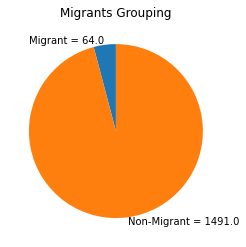

In [ ]:
# Migrants

df_data['Migrants'] = ['Migrant' if grp=='Migrant' else 'Not Migrant' if grp=='Not Migrant' else None \
                         for grp in (df_data['subgroup_name'])]

migrant = df_data[(df_data['Migrants'] == 'Migrant')]['dropout_cnt'].sum()
non_migrant = df_data[(df_data['Migrants'] == 'Not Migrant')]['dropout_cnt'].sum()

pie_data = [migrant, non_migrant]
pie_labels = ['Migrant = '+ str(migrant), 'Non-Migrant = '+ str(non_migrant)]

plt.pie(pie_data, labels=pie_labels, labeldistance=1.05, startangle=90)
plt.title('Migrants Grouping')

plt.show()

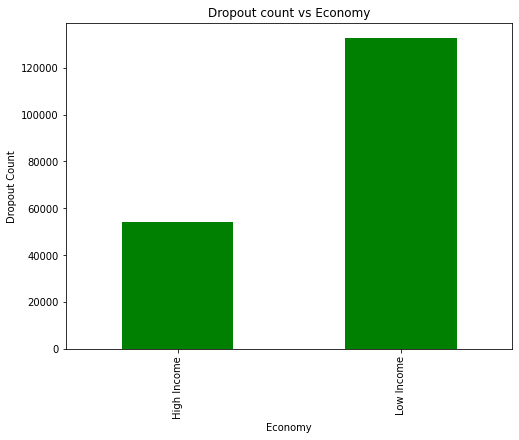

In [ ]:
# Economic Background

df_data['Economy'] = ['High Income' if grp=='Not Economically Disadvantaged' else 'Low Income' if grp=='Economically Disadvantaged' else None \
                         for grp in (df_data['subgroup_name'])]

stud_grp = df_data.groupby('Economy')['dropout_cnt'].sum()

stud_grp.plot(kind='bar', figsize=(8,6), color='green')

plt.xlabel('Economy')
plt.ylabel('Dropout Count')
plt.title('Dropout count vs Economy')

plt.show()